In [3]:
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image

from tensorflow import keras

from sklearn import model_selection
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

from tensorflow import keras

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
dir = os.path.dirname
path = dir(os.getcwd())
sys.path.append(path)
from sklearn.metrics import confusion_matrix, classification_report  
import SRC.utils_.models as md
from notebooks.df_final import df
import SRC.utils_.mining_data_tb as mn
import SRC.utils_.visualization_tb as vs
from sklearn.svm import LinearSVC

c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
                                              Lesiones             tipos  \
0    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
1    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
2    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
3    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
4    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
..                                                 ...               ...   
587  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
588  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymp

In [4]:
df["tipos"] = df["tipos"].map({0:"Adenoma", 1:"Hyperplastic", 2:"Ulcer", 3:"Normal_clean_mucosa", 4:"Lymphangiectasia"})


In [5]:

df.head()

,Lesiones,tipos,Fullpath
0,"[[[53, 112, 191], [48, 107, 187], [46, 103, 18...",Adenoma,c:\Users\Administrator\Desktop\TheBridge\Bootc...
1,"[[[30, 58, 93], [30, 58, 93], [30, 58, 93], [3...",Adenoma,c:\Users\Administrator\Desktop\TheBridge\Bootc...
2,"[[[64, 134, 174], [76, 145, 189], [114, 181, 2...",Adenoma,c:\Users\Administrator\Desktop\TheBridge\Bootc...
3,"[[[65, 100, 163], [67, 103, 166], [64, 101, 16...",Adenoma,c:\Users\Administrator\Desktop\TheBridge\Bootc...
4,"[[[43, 91, 157], [43, 91, 157], [43, 91, 157],...",Adenoma,c:\Users\Administrator\Desktop\TheBridge\Bootc...


In [26]:
def predicciones_vs_verdad(X_test,y_pred):
    plt.figure(figsize=(5, 5))
    
    for i in range(1):
        ax = plt.subplot(2,2, i + 1)
        plt.imshow(X_test[i])
        plt.title(y_pred[i])
    for i in range(1500,1502,1):
        ax = plt.subplot(1, 1, i + 1)
        plt.imshow(X_test[i])
        plt.title(y_pred[i])
        plt.axis("off")

In [2]:
df.iloc[500]

NameError: name 'df' is not defined

In [31]:
df.iloc[3000]

Lesiones    [[[12, 12, 12], [11, 11, 11], [10, 11, 11], [1...
tipos                                            Hyperplastic
Fullpath    c:\Users\Administrator\Desktop\TheBridge\Bootc...
Name: 3000, dtype: object

In [32]:
df.iloc[5000]

Lesiones    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
tipos                                        Lymphangiectasia
Fullpath    c:\Users\Administrator\Desktop\TheBridge\Bootc...
Name: 5000, dtype: object

In [40]:
df.iloc[7000]

Lesiones    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
tipos                                     Normal_clean_mucosa
Fullpath    c:\Users\Administrator\Desktop\TheBridge\Bootc...
Name: 7000, dtype: object

In [37]:
df.iloc[9000]

Lesiones    [[[6, 6, 6], [7, 7, 7], [7, 7, 7], [7, 7, 7], ...
tipos                                                   Ulcer
Fullpath    c:\Users\Administrator\Desktop\TheBridge\Bootc...
Name: 9000, dtype: object

In [ ]:
  plt.figure(figsize=(20, 10))
    
    for i in range(18):
        ax = plt.subplot(3, 6, i + 1)
        plt.imshow(X_test[i])
        plt.title(np.argmax(y_pred[i]))
        plt.axis("off")

In [18]:
ax = plt.figure(figsize=(15, 15))
ax[1,2,1].subplot(df.iloc[500][0])
ax[1,2,2].subplot(df.iloc[3000][0])
ax[2,1,1].subplot(df.iloc[5000][0])
ax[2,2,2].subplot(df.iloc[9000][0])
plt.axis("off")

TypeError: 'Figure' object is not subscriptable

<Figure size 1080x1080 with 0 Axes>

(-0.5, 99.5, 99.5, -0.5)

<Figure size 3600x3600 with 0 Axes>

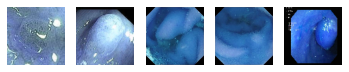

In [14]:
plt.figure(figsize=(50,50))

f, axarr = plt.subplots(1,5) 

axarr[0].imshow(df.iloc[500][0])

axarr[0].axis("off")
axarr[1].imshow(df.iloc[3000][0])
axarr[1].axis("off")
axarr[2].imshow(df.iloc[5000][0])
axarr[2].axis("off")
axarr[3].imshow(df.iloc[7000][0])
axarr[3].axis("off")
axarr[4].imshow(df.iloc[9000][0])
axarr[4].axis("off")


Text(0.5, 1.0, 'Úlcera')

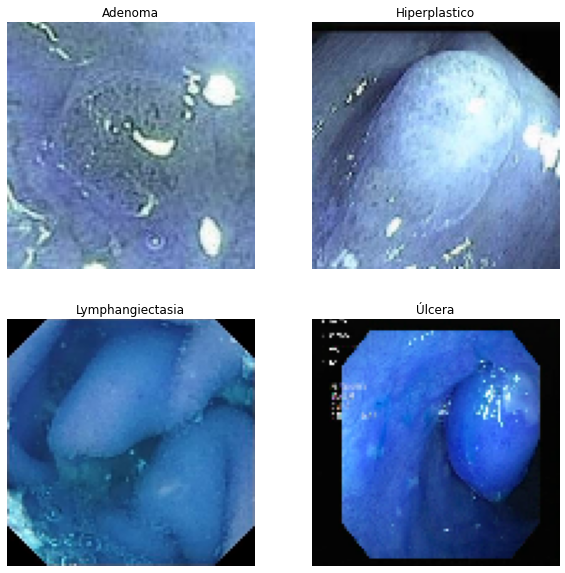

In [21]:
fig = plt.figure(figsize=(10, 10))

rows = 2
columns = 2

Image1 = df.iloc[500][0]
Image2 = df.iloc[3000][0]
Image3 = df.iloc[5000][0]
Image4 = df.iloc[9000][0]

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title("Adenoma")

fig.add_subplot(rows, columns, 2)

plt.imshow(Image2)
plt.axis('off')
plt.title("Hiperplastico")

fig.add_subplot(rows, columns, 3)

plt.imshow(Image3)
plt.axis('off')
plt.title("Lymphangiectasia")

fig.add_subplot(rows, columns, 4)

plt.imshow(Image4)
plt.axis('off')
plt.title("Úlcera")